So the most basic thing we will do to generate the dataset, and even for augmentig our image dataset later on is this. We'll use overlays of damages from the internet such as the kind I uploaded on discord. Then we'll merge the overlays with neutral backgrounds or selective backgrounds keeping in mind where these damages will take place. i've made and tested these basic functions to use. You can add yours here if you think they're useful.

Basic libraries etc that are used

In [ ]:
import cv2 
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
from __future__ import print_function


In [ ]:
uploaded2=files.upload()

Saving bhite.png to bhite.png


In [ ]:
uploaded = files.upload()

Saving TexturesCom_DecalsRusted0055_2_masked_S.png to TexturesCom_DecalsRusted0055_2_masked_S.png


Function to rotate the overlay-

In [ ]:
def rotate_image(image, angle):      #Tested
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

Function to merge two images. We will have to work on generating better functions to merge images than this-

In [ ]:
def merge_image(uploaded,uploaded2,length,width,weight1,weight2):     #tested
  #Weight has to lie between 0 and 1
  image2=cv2.resize(uploaded2,(length,width))
  image1=cv2.resize(uploaded,(length,width))
  result = cv2.addWeighted(image1, weight1, image2, weight2, 0)
  return result


There are many cases when colab is giving a black background to the png images. This function will be primarily used to make that background white. But be careful while using the overlays and test your code often. If you feel there is a more neutral colour than white for the case, just change coordinates where I've mentioned and you can basically use this to switch colours in most cases. 

In [ ]:
def switch_colour(imageup,length_int,width_int,colour1_list,colour2_list):      #Tested
  image=cv2.resize(imageup,(length_int,width_int))
  for x in range(1,length_int):
    for y in range(1,width_int):
      px=image[x,y]
      if np.array_equiv(px,colour1_list): #You can use a different coordinate here. Insert the colour YOU WANT TO REPLACE
        image[x,y]=colour2_list   #Here, insert the colour YOU WANT TO REPLACE WITH
  return image

In [ ]:
img=cv2.imread('TexturesCom_DecalsRusted0055_2_masked_S.png')
window_name='Rotated'
k=0
while(k<360):
  k+=36
  img2=rotate_image(img,k)
  m=str(k)
  l='Image '+m
  cv2_imshow(img2)
if 0xFF==ord('q'):
  cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

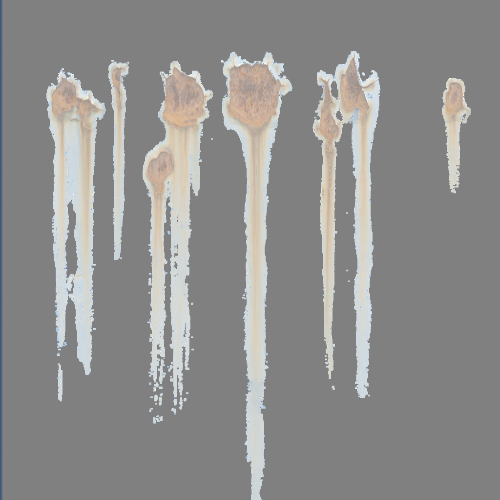

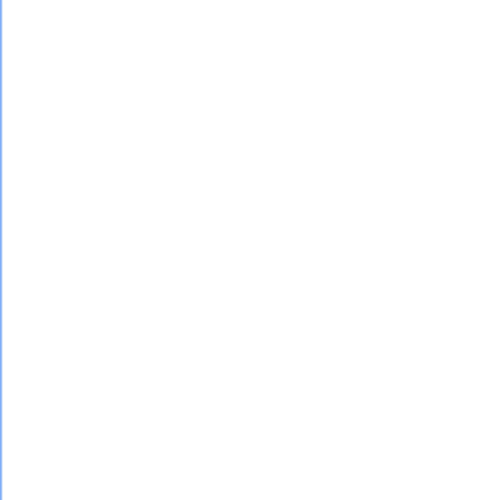

In [ ]:
img2=cv2.imread('bhite.png')
img2=switch_colour(img2,500,500,[0,0,0],[20,20,20])
cv2_imshow(merge_image(img,img2,500,500,0.5,0.5))
cv2_imshow(img2)

Making a basic image generation program-